# Add deviation to Volve wells with Welly

In [1]:
import numpy as np
from welly import Well

## Well 15/9-F-7

In [2]:
w_F7 = Well.from_las('input_data/volve_well_logs/WLC_PETROPHYSICAL_COMPOSITE - well 15_9-F-7.las')

In [27]:
w_F7.data.keys()

dict_keys(['A28H', 'A34H', 'A40H', 'GRA', 'GRM1', 'P16H', 'P16L', 'P22H', 'P22L', 'P28H', 'P28L', 'P34H', 'P34L', 'P40H', 'P40L', 'ROP5', 'SHK1', 'TABA'])

In [3]:
# welly.location module
# https://welly.readthedocs.io/en/latest/api/welly.location.html

w_F7.location

Location({'td': None, 'crs': CRS({}), 'location': '', 'country': '', 'state': 'Norway', 'county': '', 'latitude': '058 26\' 29.869" N    DMS', 'longitude': '001 53\' 14.858" E    DMS', 'api': '', 'gl': -91, 'deviation': None, 'position': None})

In [4]:
from welly import CRS
from welly import location

# EPSG:4326 WGS 84
# https://epsg.io/transform#s_srs=4326&t_srs=3857&x=1.9281581&y=58.4352861

w_F7.location.crs = CRS.from_epsg(4326)

In [5]:
w_F7.location.crs

CRS({'init': 'epsg:4326', 'no_defs': True})

In [6]:
w_F7.location.position

In [7]:
dev = np.loadtxt('input_data\wellpaths\F-7_ACTUAL', skiprows=2)
dev

array([[ 1.45900000e+02,  0.00000000e+00,  0.00000000e+00,
         1.45900000e+02, -1.11400000e+00,  1.95600000e+00,
         4.35048907e+05,  6.47856548e+06,  0.00000000e+00],
       [ 1.60000000e+02,  2.30000000e-01,  2.74410000e+02,
         1.60000000e+02, -1.14200000e+00,  1.95800000e+00,
         4.35048879e+05,  6.47856548e+06,  4.90000000e-01],
       [ 1.70000000e+02,  2.60000000e-01,  2.72780000e+02,
         1.70000000e+02, -1.18500000e+00,  1.96100000e+00,
         4.35048836e+05,  6.47856548e+06,  9.00000000e-02],
       [ 1.80000000e+02,  3.00000000e-01,  2.62140000e+02,
         1.80000000e+02, -1.23400000e+00,  1.95800000e+00,
         4.35048788e+05,  6.47856548e+06,  2.00000000e-01],
       [ 1.90000000e+02,  2.20000000e-01,  2.67670000e+02,
         1.90000000e+02, -1.27900000e+00,  1.95400000e+00,
         4.35048743e+05,  6.47856548e+06,  2.50000000e-01],
       [ 1.99000000e+02,  3.20000000e-01,  2.60350000e+02,
         1.99000000e+02, -1.32100000e+00,  1.949000

In [8]:
# First four columns in F-7_ACTUALare MD, Inc, Azim, TVD
dev[:5]

array([[ 1.45900000e+02,  0.00000000e+00,  0.00000000e+00,
         1.45900000e+02, -1.11400000e+00,  1.95600000e+00,
         4.35048907e+05,  6.47856548e+06,  0.00000000e+00],
       [ 1.60000000e+02,  2.30000000e-01,  2.74410000e+02,
         1.60000000e+02, -1.14200000e+00,  1.95800000e+00,
         4.35048879e+05,  6.47856548e+06,  4.90000000e-01],
       [ 1.70000000e+02,  2.60000000e-01,  2.72780000e+02,
         1.70000000e+02, -1.18500000e+00,  1.96100000e+00,
         4.35048836e+05,  6.47856548e+06,  9.00000000e-02],
       [ 1.80000000e+02,  3.00000000e-01,  2.62140000e+02,
         1.80000000e+02, -1.23400000e+00,  1.95800000e+00,
         4.35048788e+05,  6.47856548e+06,  2.00000000e-01],
       [ 1.90000000e+02,  2.20000000e-01,  2.67670000e+02,
         1.90000000e+02, -1.27900000e+00,  1.95400000e+00,
         4.35048743e+05,  6.47856548e+06,  2.50000000e-01]])

In [9]:
# add_deviation assumes those are the columns, and computes a position log
# Get td from NPD FactPage: https://factpages.npd.no/en/wellbore/pageview/development/all/5610

w_F7.location.add_deviation(dev[:, :3])
w_F7.location

C:\Users\LBHAWZ\AppData\Local\Continuum\anaconda3\lib\site-packages\welly\location.py:121: UserWarning: The position log could not be computed.
  warnings.warn("The position log could not be computed.")


Location({'td': None, 'crs': CRS({'init': 'epsg:4326', 'no_defs': True}), 'location': '', 'country': '', 'state': 'Norway', 'county': '', 'latitude': '058 26\' 29.869" N    DMS', 'longitude': '001 53\' 14.858" E    DMS', 'api': '', 'gl': -91, 'deviation': array([[1.45900e+02, 0.00000e+00, 0.00000e+00],
       [1.60000e+02, 2.30000e-01, 2.74410e+02],
       [1.70000e+02, 2.60000e-01, 2.72780e+02],
       [1.80000e+02, 3.00000e-01, 2.62140e+02],
       [1.90000e+02, 2.20000e-01, 2.67670e+02],
       [1.99000e+02, 3.20000e-01, 2.60350e+02],
       [2.08000e+02, 3.10000e-01, 2.26780e+02],
       [2.18000e+02, 4.00000e-01, 2.44760e+02],
       [2.29000e+02, 2.50000e-01, 2.49930e+02],
       [2.40000e+02, 4.60000e-01, 2.29350e+02],
       [2.50000e+02, 2.40000e-01, 3.04090e+02],
       [2.59000e+02, 2.20000e-01, 3.34000e+02],
       [2.70000e+02, 6.00000e-02, 6.33600e+01],
       [2.80000e+02, 3.10000e-01, 1.44100e+01],
       [2.89000e+02, 3.30000e-01, 4.28100e+01],
       [2.96000e+02, 2.2

In [10]:
w_F7.location.compute_position_log()

# A position log with rows like X-offset, Y-offset, Z-offset

# Causes AttributeError: 'Location' object has no attribute 'compute_position_log'???

# See https://welly.readthedocs.io/en/latest/api/welly.location.html
# classwelly.location.Location(params)
# compute_position_log(td=None, method='mc', update_deviation=True)

# Not sure why this isn't found!
# I can add the positions myself using X_Offset_EW , Y_Offset_NS, TVD

AttributeError: 'Location' object has no attribute 'compute_position_log'

In [11]:
# columns in the position log are x offset, y offset, and TVD.

position = np.loadtxt('input_data\wellpaths\F-7_ACTUAL', skiprows=2, usecols = (4,5,3))
position

array([[-1.11400e+00,  1.95600e+00,  1.45900e+02],
       [-1.14200e+00,  1.95800e+00,  1.60000e+02],
       [-1.18500e+00,  1.96100e+00,  1.70000e+02],
       [-1.23400e+00,  1.95800e+00,  1.80000e+02],
       [-1.27900e+00,  1.95400e+00,  1.90000e+02],
       [-1.32100e+00,  1.94900e+00,  1.99000e+02],
       [-1.36300e+00,  1.92800e+00,  2.08000e+02],
       [-1.41500e+00,  1.89400e+00,  2.18000e+02],
       [-1.47200e+00,  1.87000e+00,  2.29000e+02],
       [-1.52800e+00,  1.83300e+00,  2.40000e+02],
       [-1.57600e+00,  1.81800e+00,  2.50000e+02],
       [-1.59900e+00,  1.84500e+00,  2.59000e+02],
       [-1.60300e+00,  1.86600e+00,  2.70000e+02],
       [-1.59200e+00,  1.89500e+00,  2.80000e+02],
       [-1.56800e+00,  1.93700e+00,  2.89000e+02],
       [-1.56800e+00,  1.95300e+00,  2.96000e+02],
       [-1.60300e+00,  1.96200e+00,  3.05000e+02],
       [-1.65100e+00,  1.96500e+00,  3.17000e+02],
       [-1.83700e+00,  1.96200e+00,  3.49630e+02],
       [-1.90500e+00,  1.98700e

In [12]:
w_F7.location.position = position
w_F7.location.position[:5]

array([[ -1.114,   1.956, 145.9  ],
       [ -1.142,   1.958, 160.   ],
       [ -1.185,   1.961, 170.   ],
       [ -1.234,   1.958, 180.   ],
       [ -1.279,   1.954, 190.   ]])

In [13]:
w_F7.location.position[:5]

array([[ -1.114,   1.956, 145.9  ],
       [ -1.142,   1.958, 160.   ],
       [ -1.185,   1.961, 170.   ],
       [ -1.234,   1.958, 180.   ],
       [ -1.279,   1.954, 190.   ]])

In [14]:
w_F7.location.trajectory()

array([[   -1.89453416,     1.87800269,  -145.8804597 ],
       [   -1.89097431,     1.87582724,  -146.81791482],
       [   -1.88731853,     1.87370952,  -147.75538757],
       ...,
       [  -79.97107698,    -9.12801996, -1075.54278726],
       [  -80.10146737,    -9.14224741, -1076.47013959],
       [  -80.23160933,    -9.15638482, -1077.39750887]])

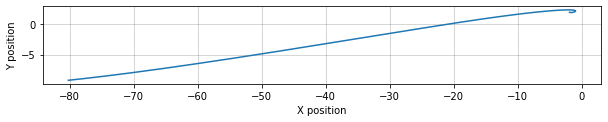

In [15]:
w_F7.location.plot_plan()

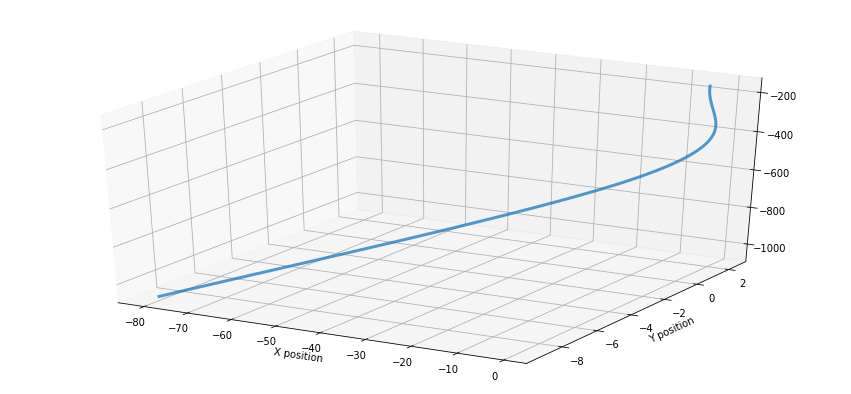

In [16]:
w_F7.location.plot_3d()

## Well 15/9-F-1 A

In [17]:
w_F1A = Well.from_las('input_data\ppinterp\WLC_PETRO_COMPUTED_OUTPUT_1 - well 15_9-F-1 A.LAS')
w_F1A

Well(uwi: '', 8 curves: ['BVW', 'COAL_FLAG', 'KLOGH', 'PHIF', 'SAND_FLAG', 'SW', 'VCARB', 'VSH'])

In [18]:
dev = np.loadtxt('input_data\wellpaths\F-1 A_ACTUAL', skiprows=2)
dev[:5]

array([[ 1.45900000e+02,  0.00000000e+00,  0.00000000e+00,
         1.45900000e+02, -3.53400000e+00,  3.16500000e+00,
         4.35046488e+05,  6.47856669e+06,  0.00000000e+00],
       [ 1.50150000e+02,  0.00000000e+00,  0.00000000e+00,
         1.50150000e+02, -3.53400000e+00,  3.16500000e+00,
         4.35046488e+05,  6.47856669e+06,  0.00000000e+00],
       [ 1.60450000e+02,  0.00000000e+00,  0.00000000e+00,
         1.60450000e+02, -3.53400000e+00,  3.16500000e+00,
         4.35046488e+05,  6.47856669e+06,  0.00000000e+00],
       [ 1.70040000e+02,  0.00000000e+00,  0.00000000e+00,
         1.70040000e+02, -3.53400000e+00,  3.16500000e+00,
         4.35046488e+05,  6.47856669e+06,  0.00000000e+00],
       [ 1.79790000e+02,  0.00000000e+00,  0.00000000e+00,
         1.79790000e+02, -3.53400000e+00,  3.16500000e+00,
         4.35046488e+05,  6.47856669e+06,  0.00000000e+00]])

In [19]:
w_F1A.location.add_deviation(dev[:, :3])
w_F1A.location

Location({'td': None, 'crs': CRS({}), 'location': 'Maersk Inspirer', 'country': '', 'province': '', 'county': 'Unused', 'latitude': '058 26\' 29.907" N    DMS', 'longitude': '001 53\' 14.708" E    DMS', 'api': '', 'deviation': array([[1.4590e+02, 0.0000e+00, 0.0000e+00],
       [1.5015e+02, 0.0000e+00, 0.0000e+00],
       [1.6045e+02, 0.0000e+00, 0.0000e+00],
       [1.7004e+02, 0.0000e+00, 0.0000e+00],
       [1.7979e+02, 0.0000e+00, 0.0000e+00],
       [1.8974e+02, 0.0000e+00, 0.0000e+00],
       [1.9850e+02, 0.0000e+00, 0.0000e+00],
       [2.1070e+02, 0.0000e+00, 0.0000e+00],
       [2.3760e+02, 1.8400e+00, 3.0224e+02],
       [2.5110e+02, 1.9100e+00, 3.0470e+02],
       [2.6490e+02, 2.4700e+00, 3.0576e+02],
       [2.7920e+02, 2.0500e+00, 3.0681e+02],
       [2.9270e+02, 1.8000e+00, 3.0400e+02],
       [3.0280e+02, 1.1300e+00, 3.3072e+02],
       [3.1550e+02, 1.4100e+00, 3.3318e+02],
       [3.3220e+02, 2.4000e+00, 3.1419e+02],
       [3.4220e+02, 2.7800e+00, 3.0118e+02],
       [

In [20]:
# Workflow on this page doesn't show how to calculate the position data
# And, as noted above, the compute_position_log function doesn't work

# https://github.com/agile-geoscience/welly/blob/master/tutorial/Well.ipynb

w_F1A.location.position[:5]

TypeError: 'NoneType' object is not subscriptable

In [21]:
# columns in the position log are x offset, y offset, and TVD.

position = np.loadtxt('input_data\wellpaths\F-1 A_ACTUAL', skiprows=2, usecols = (4,5,3))
position

array([[-3.53400e+00,  3.16500e+00,  1.45900e+02],
       [-3.53400e+00,  3.16500e+00,  1.50150e+02],
       [-3.53400e+00,  3.16500e+00,  1.60450e+02],
       [-3.53400e+00,  3.16500e+00,  1.70040e+02],
       [-3.53400e+00,  3.16500e+00,  1.79790e+02],
       [-3.53400e+00,  3.16500e+00,  1.89740e+02],
       [-3.53400e+00,  3.16500e+00,  1.98500e+02],
       [-3.53400e+00,  3.16500e+00,  2.10700e+02],
       [-3.89900e+00,  3.39600e+00,  2.37600e+02],
       [-4.26800e+00,  3.63900e+00,  2.51090e+02],
       [-4.69800e+00,  3.94400e+00,  2.64880e+02],
       [-5.15300e+00,  4.27700e+00,  2.79170e+02],
       [-5.52200e+00,  4.54000e+00,  2.92660e+02],
       [-5.70200e+00,  4.71600e+00,  3.02760e+02],
       [-5.83400e+00,  4.96500e+00,  3.15450e+02],
       [-6.17700e+00,  5.39200e+00,  3.32140e+02],
       [-6.53500e+00,  5.66300e+00,  3.42130e+02],
       [-7.30500e+00,  6.05200e+00,  3.58410e+02],
       [-8.27900e+00,  6.52200e+00,  3.77880e+02],
       [-1.01150e+01,  7.41900e

In [22]:
w_F1A.location.position = position
w_F1A.location.position[:5]

array([[ -3.534,   3.165, 145.9  ],
       [ -3.534,   3.165, 150.15 ],
       [ -3.534,   3.165, 160.45 ],
       [ -3.534,   3.165, 170.04 ],
       [ -3.534,   3.165, 179.79 ]])

In [23]:
w_F1A.location.position[:5]

array([[ -3.534,   3.165, 145.9  ],
       [ -3.534,   3.165, 150.15 ],
       [ -3.534,   3.165, 160.45 ],
       [ -3.534,   3.165, 170.04 ],
       [ -3.534,   3.165, 179.79 ]])

In [24]:
w_F1A.location.trajectory()

array([[   -3.88966963,     3.46167783,  -145.86320752],
       [   -3.77233617,     3.35783311,  -149.4136919 ],
       [   -3.66648253,     3.26472918,  -152.96319127],
       ...,
       [ -354.85261388,   869.40314196, -3234.5284356 ],
       [ -357.22763396,   870.08507203, -3237.07337661],
       [ -359.59953332,   870.77448707, -3239.62134077]])

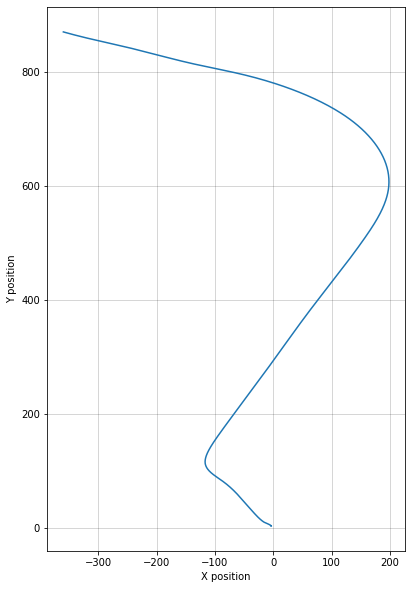

In [25]:
w_F1A.location.plot_plan()

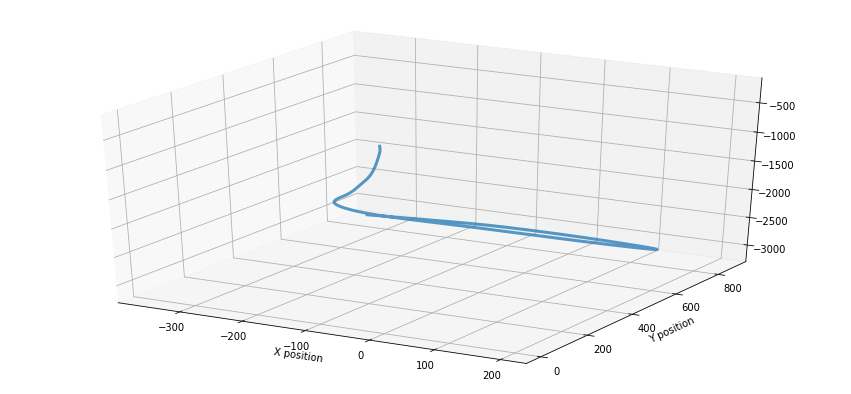

In [26]:
w_F1A.location.plot_3d()

In [ ]:
from io import StringIO

with open('../Volve_Well_technical_data/Well_technical_data/WellWellbore/15_9-19/15_9-19 BT2/Volve F_159-19_19 BT2_19 BT2_ACTUAL') as f:
    data = f.read()
    columns = data.split('SURVEY LIST')[1]

csvcols = StringIO(columns)

df = pd.read_csv(csvcols, delim_whitespace=True, header=1)

df.head()

In [ ]:
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

X = df['m.1']
Y = df['RKB.1']
Z = df['m']

max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

ax.scatter(X, Y, Z)
ax.invert_zaxis()